A Jupyter notebook that plots the episodes where 1 played 5.

In [5]:
# Hide some of the code in a module, view_recording_utils.py,
# to make the notebook less cluttered.

import numpy as np

from matplotlib import pyplot as p

from view_recording_utils import load_the_recording, \
    memory, calculate_reward_tables, calculate_rewards_per_agent

nplayers, recording = load_the_recording()

print("Number of players:", nplayers)

EPISODE_LENGTH = 100

Loaded recording: 1001472 games
Number of players: 6


`nplayers` is the number of players in the recording.

`recording` is a series of tuples of the form `(permutation, actions)`
- `permutation` records the matching between players. Player $j$ is matched with player ${\tt permutation}(j)$.
- `actions` records the action of the players. Typically 0 = cooperate and 1 = defect.

The number of games per episode is not recorded, but it's always been 100 so far.

In [6]:
reward = {
    (0, 0): 0,
    (0, 1): 1,
    (1, 0): 2,
    (1, 1): 0
}

These are the game's rewards. Make sure that they match the ones in `train.py`!

In [7]:
# Collect all the episodes where 1 played 5

one_versus_five_games = []
i = 0
for permutation,actions in recording:
    i += 1
    if permutation[0] == 4: # one vs five
        one_versus_five_games.append((i, actions[0], actions[4]))

one_versus_five_episodes = [
    one_versus_five_games[idx:idx+EPISODE_LENGTH]
    for idx in range(0, len(one_versus_five_games), 100)
]


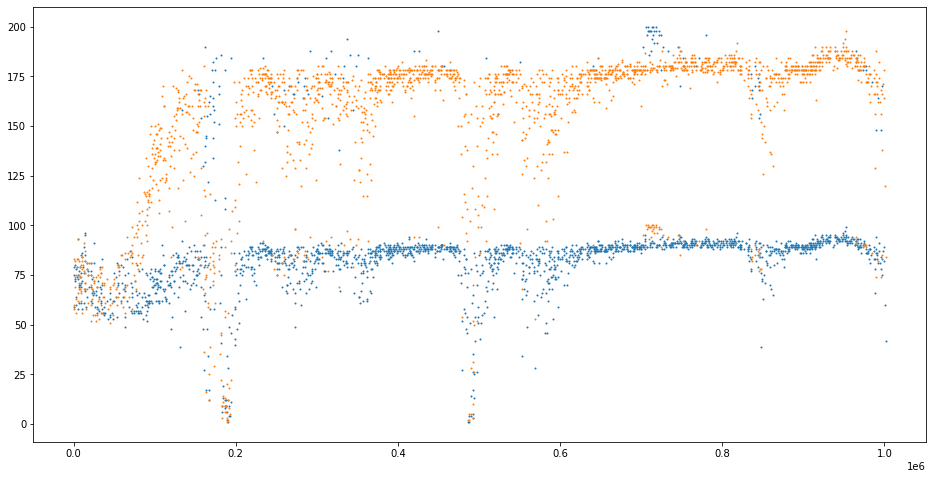

In [8]:
# Draw a scatter plot showing the rewards of the episodes where 1 played 5

def calculate_reward_of_episode_for_one(episode):
    total = 0
    for line in episode:
        _,a,b = line
        total += reward[a, b]
    return total

def calculate_reward_of_episode_for_five(episode):
    total = 0
    for line in episode:
        _,a,b = line
        total += reward[b, a]
    return total

def get_episode_start_timestep(episode):
    return episode[0][0]

p.figure(figsize=(16, 8))
p.scatter([get_episode_start_timestep(episode) for episode in one_versus_five_episodes],
          [calculate_reward_of_episode_for_one(episode) for episode in one_versus_five_episodes],
          s = 1)
p.scatter([get_episode_start_timestep(episode) for episode in one_versus_five_episodes],
          [calculate_reward_of_episode_for_five(episode) for episode in one_versus_five_episodes],
          s = 1)
p.show()